In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/Mall_Customers.csv", index_col=0)

In [66]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [68]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

df = df.drop(columns=['Gender', 'Age'], axis=1)

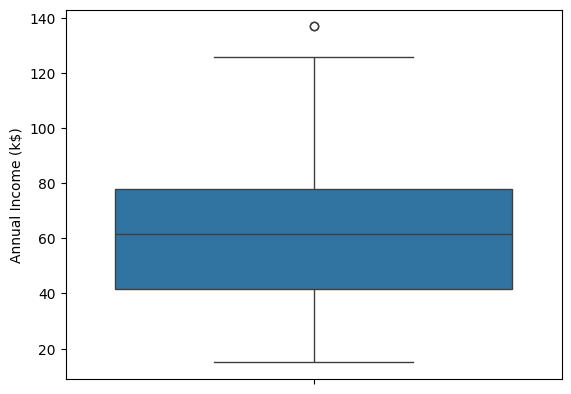

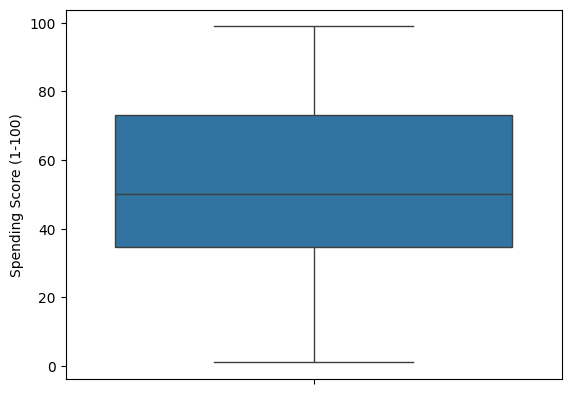

In [69]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

In [70]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
inertia  = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

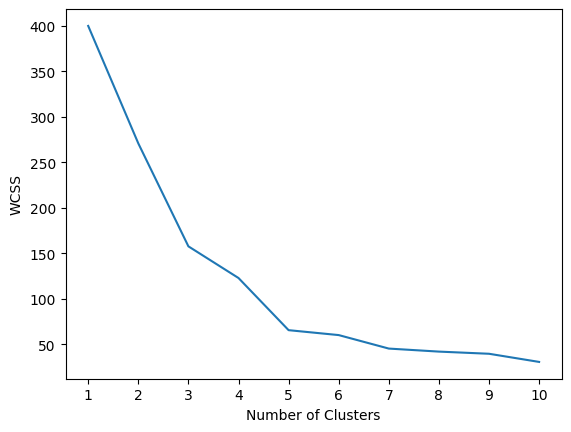

In [73]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

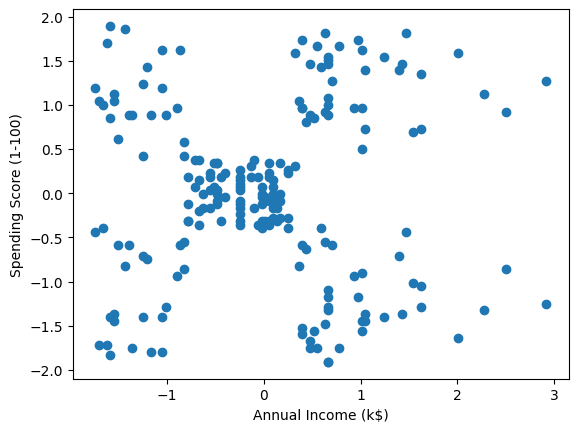

In [74]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [75]:
# assuming k = 5
kmeans = KMeans(n_clusters=5, init='k-means++')
clusters = kmeans.fit(X_scaled)
df['cluster'] = clusters.labels_

In [76]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
20,Female,35,23,98,4
141,Female,57,75,5,2
93,Male,48,60,49,1
37,Female,42,34,17,1
16,Male,22,20,79,4


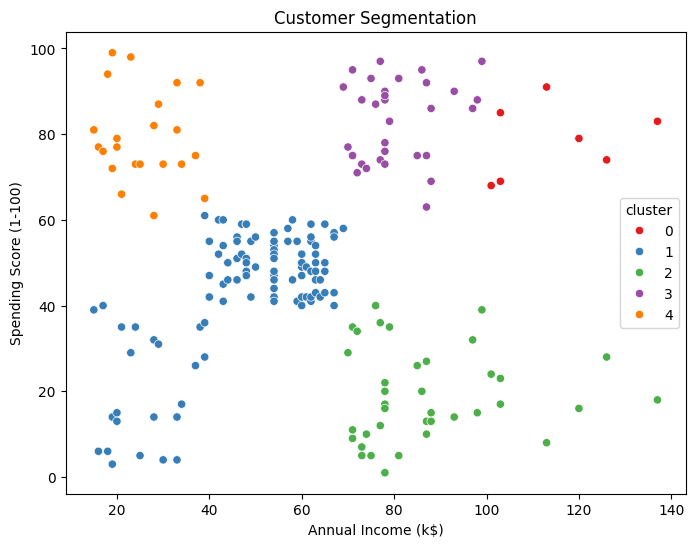

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df, palette='Set1')
plt.title('Customer Segmentation')
plt.show()

In [78]:
df.groupby('cluster').agg({'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})

# cluster 0 : high income, high spending
# cluster 1 : high income, low spending
# cluster 2 : middle income, low spending
# cluster 3 : middle income, high spending
# cluster 4 : low income, high spending

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,114.714286,78.428571
1,48.168317,43.396040
2,87.000000,18.631579
3,80.375000,82.937500
4,25.727273,79.363636


In [79]:
sample = [[70, 60], [80, 70], [90, 80]]
sample

[[70, 60], [80, 70], [90, 80]]

In [80]:
new_data_scaled = scaler.transform(sample)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
sample_pred = kmeans.predict(new_data_scaled)
sample_pred

array([3, 3, 3], dtype=int32)